# Seaborn and Cornavirus Graphs

## Introduction

The Financial Times have a  been releasing a very good set of graphics, tracking Cornaviros Virus deaths in a variety of countries.  I think they have been using R to do their graphics.

Recently, they released their dataset, and I decided to practise some visualizations of my own, in Python.

Now, there is a ethical question here:  each months data point represents suffering, misery, and grief.  It seems a little unfeeling to use it as example of data visualization. However, important data needs thoughtful data visualization: it took a little digging to get exactly the techniques I use here, and it may useful for others.

----
## Notebook Setup

```watermark``` documents my environment, ```black``` is my chosen formatter

In [20]:
%load_ext watermark
%load_ext lab_black

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


All imports go here

In [21]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import dates

import sys
import os
import subprocess
import datetime
import platform
import datetime

----
## Dataset Load and Exploration

We load the dataset, and explore it.

In [22]:
data = pd.read_csv('../data/ft_excess_deaths.csv')

In [23]:
data.head()

,country,region,period,year,month,week,date,deaths,expected_deaths,excess_deaths,excess_deaths_pct
0,Italy,Italy,week,2015,1,2.0,2015-01-09,15531.0,15531.0,0.0,0.000000
1,Italy,Italy,week,2015,1,3.0,2015-01-16,15490.0,15664.0,-174.0,-1.110827
2,Italy,Italy,week,2015,1,4.0,2015-01-23,14965.0,15283.0,-318.0,-2.080743
3,Italy,Italy,week,2015,1,5.0,2015-01-30,14810.0,14907.0,-97.0,-0.650701
4,Italy,Italy,week,2015,2,6.0,2015-02-06,15495.0,14834.0,661.0,4.455980


In [24]:
data['country'].unique()

array(['Italy', 'Netherlands', 'Ecuador', 'Spain', 'France', 'Turkey',
       'Indonesia', 'Russia', 'Brazil', 'Peru', 'Chile', 'US', 'UK',
       'Belgium', 'Portugal', 'Denmark', 'Austria', 'Germany', 'Sweden',
       'South Africa', 'Norway', 'Israel', 'Iceland', 'Switzerland'],
      dtype=object)

Clean up the date column (create a new column)

In [25]:
data['date2'] = pd.to_datetime(
    data['date'], format='%Y-%m-%d'
)

----
## Visualizations

For my purposes, I decided to select those data rows for each country as a whole (there are rows for sub-regions with a number of countries).

One key insite of the Financial Times analysis is that mortality due to the virus is best estimated by year on year mortality comparisions.  Excess deaths in 2020, compared to previous years, is an estimate of deaths due to the virus.  For the first plot we show the excess deaths for a 10 year time span, for each country.

In [26]:
data3 = data[data['country'] == data['region']]

I want to produce a number of mini-graphs, one for each country, and I want each subplot to be formatted the same way.  We create a function for that.  Date x-tick labels can be a pain, because they overlap.  We fix that by not labelling every tick mark, truncating the default label, and rotating the text.  To help in reading off the maximum mortality rate, we draw a grid from the y axis, and draw the y=0 line.

In [27]:
def set_subplot_style(*args, **kwargs):

    # get the current Axes object
    ax = plt.gca()

    # just show year in x axis labels
    hfmt = dates.DateFormatter('%Y')

    # we just want ticks and labels at every second year
    ax.xaxis.set_major_locator(dates.YearLocator(2))

    ax.xaxis.set_major_formatter(hfmt)

    # rotate x tick labels
    ax.tick_params(axis='x', labelrotation=90)

    # draw y=0 axis (de-emphised)
    ax.axhline(0, color='grey', alpha=0.5)

    # draw grid from  y axis only
    ax.grid(axis='y', which='major', alpha=0.5)


# end set_subplot_style

We now use Seaborn to create a grid of graphs for the data in our ```data3``` dataframe, where each mini-graph relates to one country.  The grid will be five wide.  We then use methods of the ```grid``` object (especially the ```map``` method) to run the same graphing and layout in each subplot.  Each country will have its own color for line plots.  Note the call ```grid.set_titles('{col_name}')``` that gives us the country name in each mini-graph title

We want a large figure title, so we have to scrunch the min-graph grid down a little.  This makes room for the title, and text providing the data source.

Text(0.5, 0.94, 'Source: https://github.com/Financial-Times/coronavirus-excess-mortality-data')

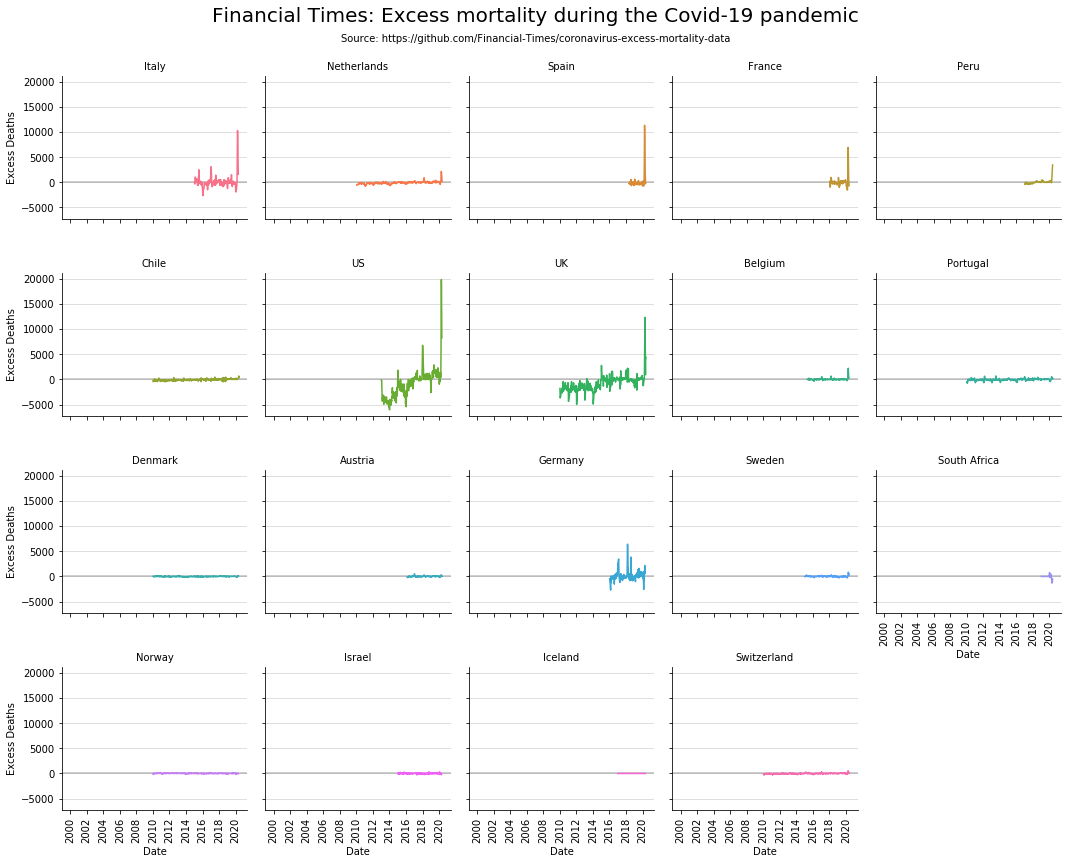

In [28]:
grid = sns.FacetGrid(
    data3,
    col='country',
    hue='country',
    col_wrap=5,
    height=3,
)

# set our style for each subplot
grid.map(set_subplot_style)

# plot data in each subplot
grid.map(plt.plot, 'date2', 'excess_deaths')

# set subplot title to be country name
grid.set_titles('{col_name}')

# rename all x and y axis labels
grid.set_xlabels('Date')
grid.set_ylabels('Excess Deaths')

# put on a big Figure title, then  make room for it (need top 10%)
grid.fig.suptitle(
    'Financial Times: Excess mortality during the Covid-19 pandemic\n',
    size=20,
)
grid.fig.subplots_adjust(top=0.9, bottom=0.05)

# add source of data, center of figure, just below title
plt.figtext(
    0.5,
    0.94,
    'Source: https://github.com/Financial-Times/coronavirus-excess-mortality-data',
    horizontalalignment='center',
)

The graphic above show the exceptional nature of 2020.

---
## 2020 Deaths

We now want to focus on 2020.  We show the datatypes of the ```data3``` DataFrame object.  Then we create a timestamp for the last day of 2019, and select all data rows with a date greater than that value.

In [29]:
data3.dtypes

country                      object
region                       object
period                       object
year                          int64
month                         int64
week                        float64
date                         object
deaths                      float64
expected_deaths             float64
excess_deaths               float64
excess_deaths_pct           float64
date2                datetime64[ns]
dtype: object

In [30]:
pd.to_datetime('2020-01-01')

Timestamp('2020-01-01 00:00:00')

In [31]:
data4 = data3[
    data3['date2'] > pd.to_datetime('2019-12-31')
].copy()

Check that we only have 2020 data rows

In [32]:
min(data4['date2'])

Timestamp('2020-01-03 00:00:00')

We have slightly different formatting rules now, mostly in labelling the months (not years) on the x axis

In [33]:
def set_subplot_style2(*args, **kwargs):

    # get the current Axes object
    ax = plt.gca()

    # just show month in x axis labels
    hfmt = dates.DateFormatter('%m')

    # we just want ticks and labels at every month
    ax.xaxis.set_major_locator(dates.MonthLocator())

    ax.xaxis.set_major_formatter(hfmt)

    # rotate x tick labels
    ax.tick_params(axis='x', labelrotation=90)

    # draw y=0 axis (de-emphised)
    ax.axhline(0, color='grey', alpha=0.5)

    # draw grid from  y axis only
    ax.grid(axis='y', which='major', alpha=0.5)


# end set_subplot_style2

Now we can see the tragedy unfolding in each country.  One technical note: it is important to do the actual plotting ```grid2.map(plt.plot, ...``` before the call to ```grid2.map(set_subplot_style2)```, because my function has a call to ```axhline```, which needs to know the maximum and minimum x values being plotted.

Text(0.5, 0.94, 'Source: https://github.com/Financial-Times/coronavirus-excess-mortality-data')

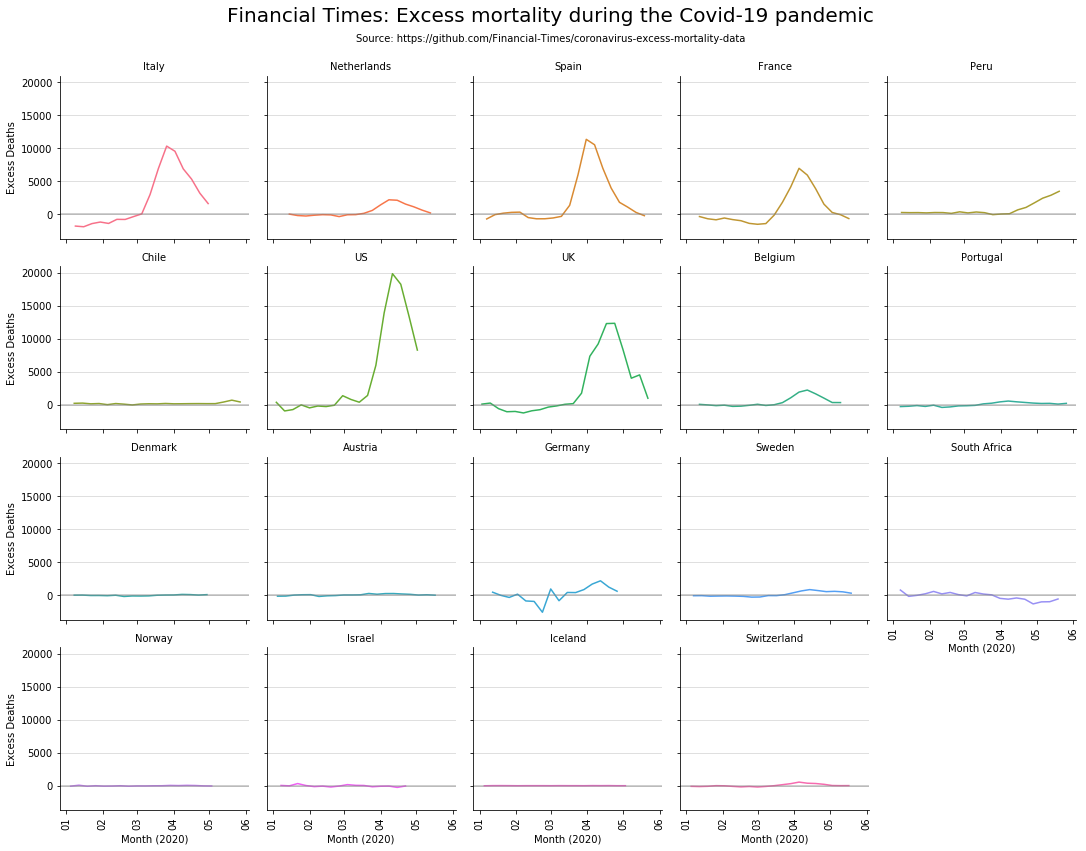

In [34]:
grid2 = sns.FacetGrid(
    data4,
    col='country',
    hue='country',
    col_wrap=5,
    height=3,
)

# plot data in each subplot
grid2.map(plt.plot, 'date2', 'excess_deaths')

# set our style for each subplot
grid2.map(set_subplot_style2)

# set subplot title to be country name
grid2.set_titles('{col_name}')

# rename all x and y axis labels
grid2.set_xlabels('Month (2020)')
grid2.set_ylabels('Excess Deaths')

# put on a big Figure title, then  make room for it (need top 10%)
grid2.fig.suptitle(
    'Financial Times: Excess mortality during the Covid-19 pandemic\n',
    size=20,
)
grid2.fig.subplots_adjust(top=0.9, bottom=0.05)

# add source of data, center of figure, just below title
plt.figtext(
    0.5,
    0.94,
    'Source: https://github.com/Financial-Times/coronavirus-excess-mortality-data',
    horizontalalignment='center',
)

-----
## Worst Affected Countries

Next, I decided to select those countries that had a monthly death rate (at least once) greater the some threshold (here, 5,000 deaths).

I get the list of all countries, and only keep those that have a maximum monthly death rate greater than the threshold.

Then I create a boolean mask that filters out those countries not in our list.  

In [35]:
DEATH_THRESHHOLD = 5000

death_countries = [
    c
    for c in data4['country'].unique()
    if max(data4[data4['country'] == c]['excess_deaths'])
    > DEATH_THRESHHOLD
]
death_countries

mask = [c in death_countries for c in data4['country']]

This time I want the compare each country in a closer context with each other country, so I use a Seaborn ```relplot```.  I elect to use a small marker to show the actual data points.  The default x axis labels are fine in the plot (being larger).  Given the size of my plot, I make the lines a little wider

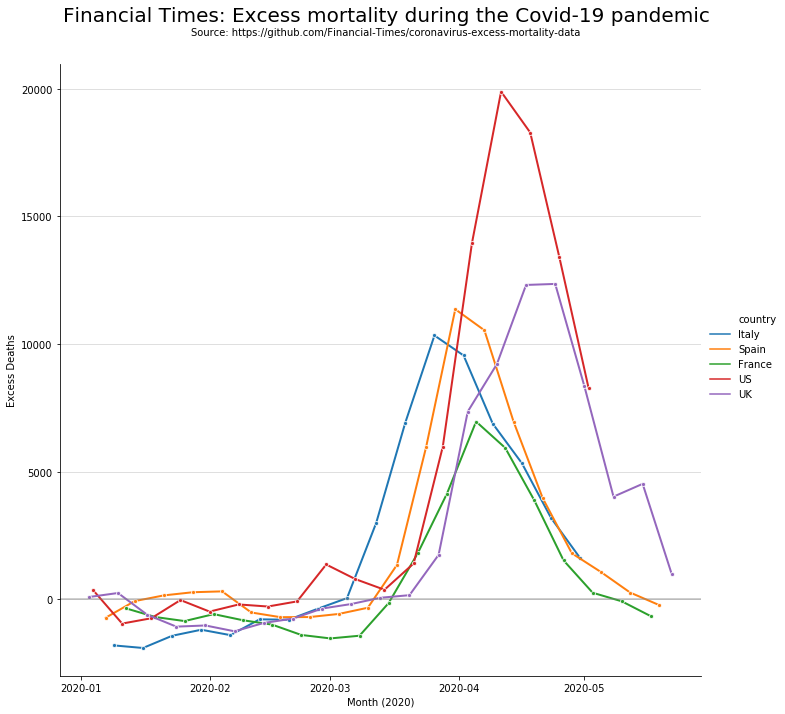

In [36]:
g = sns.relplot(
    x='date2',
    y='excess_deaths',
    kind='line',
    hue='country',
    data=data4[mask],
    alpha=1,
    height=10,
    linewidth=2,
    marker='o',
    markersize=4,
)

# rename all x and y axis labels
g.set_xlabels('Month (2020)')
g.set_ylabels('Excess Deaths')

g.fig.suptitle(
    'Financial Times: Excess mortality during the Covid-19 pandemic\n',
    size=20,
)
g.fig.subplots_adjust(top=0.9, bottom=0.05)

# add source of data, center of figure, just below title
plt.figtext(
    0.5,
    0.94,
    'Source: https://github.com/Financial-Times/coronavirus-excess-mortality-data',
    horizontalalignment='center',
)

# draw y=0 axis (de-emphised)
plt.axhline(0, color='grey', alpha=0.5)

# draw grid from  y axis only
plt.grid(axis='y', which='major', alpha=0.5)

----
## Conclusions

Seaborn allowed me to produce two quite different graphics, with only a minimum of Googling to get exactly what I wanted.  I become  more impressed with Seaborn, especially now I understand the ```FacetGrid``` better.

----
## Environment

In [37]:
%watermark

2020-06-07T12:12:20+10:00

CPython 3.7.1
IPython 7.2.0

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit


In [38]:
# show info to support reproducibility

theNotebook = 'death.ipynb'


def python_env_name():
    envs = subprocess.check_output(
        'conda env list'
    ).splitlines()
    # get unicode version of binary subprocess output
    envu = [x.decode('ascii') for x in envs]
    active_env = list(
        filter(lambda s: '*' in str(s), envu)
    )[0]
    env_name = str(active_env).split()[0]
    return env_name


# end python_env_name

print('python version     : ' + sys.version)
print('python environment :', python_env_name())

print('current wkg dir    : ' + os.getcwd())
print('Notebook name      : ' + theNotebook)
print(
    'Notebook run at    : '
    + str(datetime.datetime.now())
    + ' local time'
)
print(
    'Notebook run at    : '
    + str(datetime.datetime.utcnow())
    + ' UTC'
)
print('Notebook run on    : ' + platform.platform())

python version     : 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
python environment : ac5-py37
current wkg dir    : C:\Users\donrc\Documents\JupyterNotebooks\PythonNotebookProject\develop
Notebook name      : death.ipynb
Notebook run at    : 2020-06-07 12:12:24.326835 local time
Notebook run at    : 2020-06-07 02:12:24.326835 UTC
Notebook run on    : Windows-10-10.0.18362-SP0
